In [ ]:
#Cargamos las librerias utilizadas para realizar el análisis
library(readxl)
library(dplyr)
library(ggplot2)
library(scales)
library(stringr)
library(nortest)
library(corrplot)
library(PerformanceAnalytics)
library(GGally)
library(ggradar)
library(gmodels)
library(DescTools)
library(tidyr)
library(scatterplot3d)
library(gmodels)

Warning message:
"package 'readxl' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'scales' was built under R version 3.6.3"Warning message:
"package 'stringr' was built under R version 3.6.3"Warning message:
"package 'nortest' was built under R version 3.6.3"Warning message:
"package 'corrplot' was built under R version 3.6.3"corrplot 0.88 loaded
Warning message:
"package 'PerformanceAnalytics' was built under R version 3.6.3"Loading required package: xts
Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Registered S3 method overwritten by 'xts':
  method    

In [ ]:
#Cargamos la base de datos a utilizar
secundaria_promedios <- read_excel("C:\\Users\\patoa\\OneDrive\\Escritorio\\Anchu\\Exploracion de datos multi\\promedios_secundaria.xlsx")
secundarias_base <- read_excel("C:\\Users\\patoa\\OneDrive\\Escritorio\\Anchu\\Exploracion de datos multi\\Secundaria3.xlsx")
secundaria_promedios <- na.omit(secundaria_promedios)

# Comenzamos con los análisis

# Tipificación y Comparación de Medias

In [ ]:
#Analizamos el rendimiento de las escuelas públicas y privadas en Matemática comparando
#con la media obtenida de todo el departamento
#Calculamos los estadísticos del departamento
mediagral <- mean(filter(secundaria_promedios, Materia == "MATEMATICA")$Promedio)
desvio <- sd(filter(secundaria_promedios, Materia == "MATEMATICA")$Promedio)

#Calculamos la media para cada tipo de escuela
mediapriv <- mean(filter(secundaria_promedios, Materia == "MATEMATICA" & EsPrivada == "S")$Promedio)
mediapub <- mean(filter(secundaria_promedios, Materia == "MATEMATICA" & EsPrivada == "N")$Promedio)

#Calculamos la puntuación Z
Zpriv <- (mediapriv-mediagral)/desvio #0.303 Por encima del promedio
Zpub <- (mediapub-mediagral)/desvio  #-0.117 Por debajo del promedio


[1] -1.41982

In [ ]:
#Comparamos el rendimiento del primer año en matemática, para una escuela pública y una escuela privada particular
#Separamos dos datasets para cada escuela
privada_primero <- filter(secundaria_promedios, CUE == 6000116 & Curso == 1 & Materia == "MATEMATICA")
publica_primero <- filter(secundaria_promedios, CUE == 6005160 & Curso == 1 & Materia == "MATEMATICA")
#Creamos los vectores para comparar
publica_n <- as.numeric(filter(secundaria_promedios,Curso == 1 & Materia =="MATEMATICA" & CUE == 6000116)$Promedio) # Primer grupo
privada_n <-  as.numeric(filter(secundaria_promedios,Curso == 1 & Materia =="MATEMATICA" & CUE == 6005160)$Promedio)

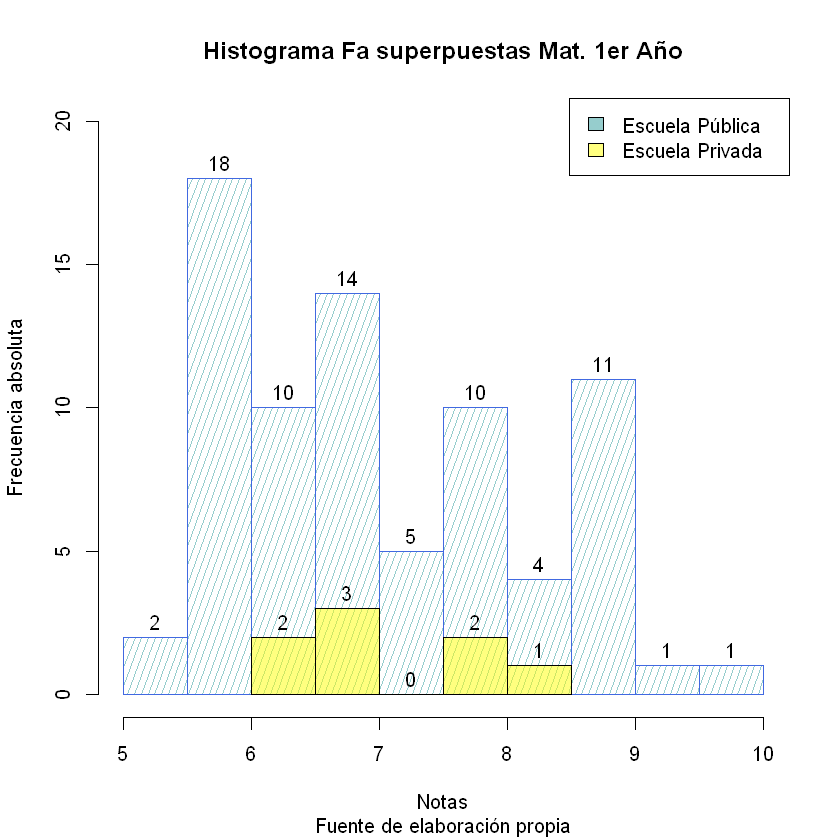

In [ ]:
#Histograma superpuesto de Frecuencias absolutas
hist(publica_n,
     col="paleturquoise3",
     border="royalblue",
     breaks = "Sturges",
     ylim = c(0, 20),
     xlim = c(5,10),
     density=20,
     angle=70,
     xlab="Notas",
     ylab="Frecuencia absoluta",
     main="Histograma Fa superpuestas Mat. 1er Año",
     labels = TRUE,
     sub = "Fuente de elaboración propia")

hist(privada_n,
     add = TRUE,
     col = rgb(1, 1, 0, alpha = 0.5),
     breaks = "Sturges",
     labels = TRUE )

#Legenda
legend("topright",
       legend = c("Escuela Pública", "Escuela Privada"),
       fill = c("paleturquoise3", "#FFFF0080"))

In [ ]:
#Para poder comparar de una mejor manera normalizamos las muestras y volvemos a crear el histograma
privada_primero <- mutate(privada_primero, tipificado = ((privada_primero$Promedio)-7.14)/1.13)
publica_primero <- mutate(publica_primero, tipificado = ((publica_primero$Promedio)-7.083)/0.86)
x <- privada_primero$tipificado
y <- publica_primero$tipificado

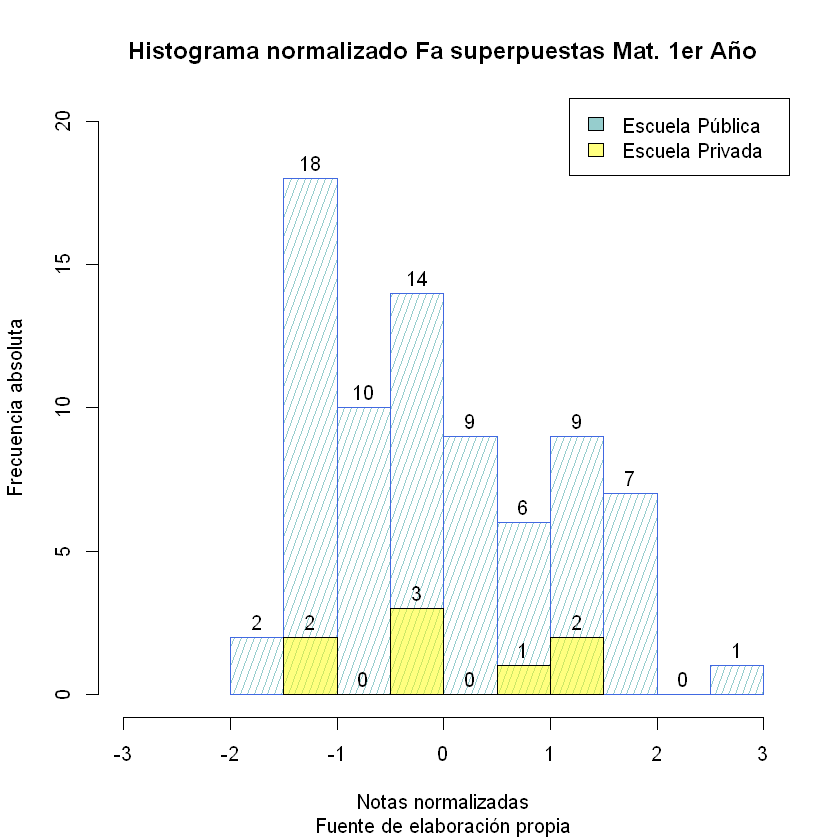

In [ ]:
#Creamos nuevamente el histograma
hist(x,
     col="paleturquoise3",
     border="royalblue",
     breaks = "Sturges",
     ylim = c(0, 20),
     xlim = c(-3,3),
     density=20,
     angle=70,
     xlab="Notas normalizadas",
     ylab="Frecuencia absoluta",
     main="Histograma normalizado Fa superpuestas Mat. 1er Año",
     sub = "Fuente de elaboración propia",
     labels = T)

hist(y,
     add = TRUE,
     col = rgb(1, 1, 0, alpha = 0.5),
     breaks = "Sturges",
     xlim = c(-3,3),
     sub = "Fuente de elaboración propia",
     labels = T)

#Legenda
legend("topright",
       legend = c("Escuela Pública", "Escuela Privada"),
       fill = c("paleturquoise3", "#FFFF0080"))

# Comparamos los rendimientos en Matemática para el primer año tomando según Sector.

In [ ]:
#Muestras indpendientes
#Hipótesis generada: existe diferencia significativa entre las notas de ambos turnos?
#H0: media privada = media pública
#H1: media privada ≠  media pública
#Creamos la muestra
primero_priv <- filter(secundaria_promedios, Curso == 1 & Materia == "MATEMATICA" & EsPrivada == "S")
primero_pub <- filter(secundaria_promedios, Curso == 1 & Materia == "MATEMATICA" & EsPrivada == "N")

#Comprobamos los supuestos de normalidad
lillie.test(primero_priv$Promedio) #pvalor: 5.508e-08
lillie.test(primero_pub$Promedio) #pvalor: 2.145e-11
#Rechazamos H0 y concluimos que las muestras no son normales

#Realizamos el test --> prueba no paramétrica para un par de muestras independientes (Test de Wilcoxon)
wilcox.test(primero_priv$Promedio, primero_pub$Promedio,
           alternative = "two.sided",
           conf.level = 0.05) #pvalor: 2.666e-07 < 0.05: rechazamos H0, existe una diferencia significativa



	Lilliefors (Kolmogorov-Smirnov) normality test

data:  primero_tarde$Promedio
D = 0.1482, p-value = 5.508e-08



	Lilliefors (Kolmogorov-Smirnov) normality test

data:  primero_mañana$Promedio
D = 0.12154, p-value = 2.145e-11



	Wilcoxon rank sum test with continuity correction

data:  primero_mañana$Promedio and primero_tarde$Promedio
W = 25550, p-value = 8.104e-05
alternative hypothesis: true location shift is not equal to 0


# Comparación por matrícula de cada curso

In [ ]:
#Creamos las muestras
secundarias_base <- filter(secundarias_base, Departamento == "DIAMANTE")
Primero <- secundarias_base$Primero
Segundo <- secundarias_base$Segundo
Tercero <- secundarias_base$Tercero
Cuarto <- secundarias_base$Cuarto
Quinto <- secundarias_base$Quinto
Sexto <- secundarias_base$Sexto
#Creamos un nuevo dataset de doble entrada
matricula <- as.numeric(c(Primero,Segundo,Tercero,Cuarto,Quinto,Sexto))
curso <- as.factor(c(rep("Primero",length(Primero)),
                     rep("Segundo",length(Segundo)),
                     rep("Tercero",length(Tercero)),
                     rep("Cuarto",length(Cuarto)),
                     rep("Quinto",length(Quinto)),
                     rep("Sexto", length(Sexto))))
matricula_curso <- data.frame(curso,matricula)
matricula_curso
matricula_curso$curso  <- factor(matricula_curso$curso, levels = c("Primero","Segundo","Tercero","Cuarto","Quinto","Sexto"))

curso,matricula
Primero,99
Primero,10
Primero,14
Primero,3
Primero,11
Primero,7
Primero,10
Primero,10
Primero,78
Primero,62


In [ ]:
#Graficamos (Boxplot)
boxplot(matricula_curso$matricula ~ matricula_curso$curso,
        col = c("yellow", "blue", "orange","green","purple","brown"),
        ylim = c(0,300),
        ylab = "Matricula por curso",
        xlab="Cursos",
        sub="Fuente de elaboración propia",
        main="Cantidad de matriculas por curso en el departamento de Diamante")

Cue_Anexo,Nivel,Modalidad_Educ_Gral,Cue,Estado,Sector,Departamento,NINA,Cant_Secciones,Tipo_titulo,...,Segundo,Tercero,Cuarto,Quinto,Sexto,Septimo,Mat_ciclo_basico,Mat_ciclo_orientado,Matricula_Total,Titulo
600003600,Secundaria,Común,6000036,Activo,ESTATAL,NA,no,18,Ciclo básico/ educación secundaria básica,...,79,73,65,54,61,0,219,180,399,Bachiller en ciencias sociales y humanidades; Bachiller en economía y administración
600035000,Secundaria,Común,6000350,Activo,ESTATAL,NA,no,6,Ciclo básico/ educación secundaria básica,...,17,11,9,7,7,0,44,23,67,Bachiller en economía y administración
600046400,Secundaria,Común,6000464,Activo,ESTATAL,FEDERACION,no,13,Ciclo básico/ educación secundaria básica,...,60,32,39,43,NA,0,157,99,256,Bachiller con orientación en arte; Bachiller en economía y administración
600067800,Secundaria,Común,6000678,Activo,ESTATAL,NA,no,17,Ciclo básico/ educación secundaria básica,...,45,47,41,37,40,0,127,118,245,Bachiller en ciencias naturales; Bachiller en economía y administración
600093400,Secundaria,Común,6000934,Activo,ESTATAL,VILLAGUAY,no,37,Ciclo básico/ educación secundaria básica,...,146,103,184,120,73,0,345,377,722,Bachiller con orientación en economía y administración; Bachiller con orientación en economía y administración; Bachiller orientado en ciencias naturales; Bachiller con orientación en ciencias sociales y humanidades
600110200,Secundaria,Común,6001102,Activo,ESTATAL,NA,no,14,Ciclo básico/ educación secundaria básica,...,73,66,59,39,43,0,199,141,340,Bachiller con orientación en ciencias naturales; Bachiller en ciencias sociales y humanidades


In [ ]:
#Generamos el modelo de ANOVA para poder comprobar si existe diferencia significativa en las matrículas
#H0: Todas las medias son iguales
#H1: Al menos una media difiere del resto
#Genero el modelo de ANOVA
modelo_matricula = aov( matricula ~ curso )
summary(modelo_matricula) #En un principio como pvalor = 0.593 > 0.05, no tenemos evidencia para rechazar H0

#Comprobamos supuestos de normalidad
lillie.test(matricula_curso$matricula[matricula_curso$curso == "Primero"])
lillie.test(matricula_curso$matricula[matricula_curso$curso == "Segundo"])
lillie.test(matricula_curso$matricula[matricula_curso$curso == "Tercero"])
lillie.test(matricula_curso$matricula[matricula_curso$curso == "Cuarto"])
lillie.test(matricula_curso$matricula[matricula_curso$curso == "Quinto"])
lillie.test(matricula_curso$matricula[matricula_curso$curso == "Sexto"])
#Todos obtuvieron un pvalor<0.05, rechazamos la hipótesis de normalidad --> debemos aplicar una prueba de tipo no paramétrica

             Df Sum Sq Mean Sq F value Pr(>F)
curso         5   4650     930   0.742  0.593
Residuals   147 184160    1253               
3 observations deleted due to missingness


	Shapiro-Wilk normality test

data:  matricula_curso$matricula[matricula_curso$curso == "Primero"]
W = 0.80296, p-value = 0.0001978



	Shapiro-Wilk normality test

data:  matricula_curso$matricula[matricula_curso$curso == "Segundo"]
W = 0.80364, p-value = 0.0002032



	Shapiro-Wilk normality test

data:  matricula_curso$matricula[matricula_curso$curso == "Tercero"]
W = 0.77536, p-value = 9.068e-05



	Shapiro-Wilk normality test

data:  matricula_curso$matricula[matricula_curso$curso == "Cuarto"]
W = 0.83743, p-value = 0.001026



	Shapiro-Wilk normality test

data:  matricula_curso$matricula[matricula_curso$curso == "Quinto"]
W = 0.8092, p-value = 0.000325



	Shapiro-Wilk normality test

data:  matricula_curso$matricula[matricula_curso$curso == "Sexto"]
W = 0.82647, p-value = 0.0005142


In [ ]:
#Test no paramétrico de Kruskall Wallis
kruskal.test(matricula_curso$curso,matricula_curso$matricula) #pvalor: 0.5445 > 0.05
#No podemos rechazar H0 por falta de evidencia, no existe diferencia entre los cursos de las escuelas secundarias de diamante.


	Kruskal-Wallis rank sum test

data:  matricula_curso$curso and matricula_curso$matricula
Kruskal-Wallis chi-squared = 70.009, df = 72, p-value = 0.5445


# Comparación de las notas obtenidas en los tres trimestres de Matemática (1er Año) Según la gestión


In [ ]:
#Creamos nuestras muestras de estudio (Pareadas)
matematica_primero <-  filter(secundaria_promedios, Curso == 1 & Materia == "MATEMATICA")
matematica_primero <- na.omit(matematica_primero)

matematica_primero_priv<- filter(matematica_primero, EsPrivada == "S")
matematica_primero_pub <- filter(matematica_primero, EsPrivada == "N")

matematica_primero_priv <- subset(matematica_primero_priv, !duplicated(DNI))
matematica_primero_pub <- subset(matematica_primero_pub, !duplicated(DNI))



primertri_priv<- matematica_primero_priv$NotasPTS
primertri_pub <- matematica_primero_pub$NotasPTS
segundotri_priv <-matematica_primero_priv$NotasSTS
segundotri_pub <-matematica_primero_pub$NotasSTS
tercertri_priv <-matematica_primero_priv$NotasTTS
tercertri_pub <-matematica_primero_pub$NotasTTS
dnipriv<- unique(matematica_primero_priv$DNI)
dnipub<- unique(matematica_primero_pub$DNI)

#Nuevos dataframe para análisis
#Escuelas privadas
notaspriv <- as.numeric(c(primertri_priv,segundotri_priv,tercertri_priv))

trimestrespriv <- as.factor(c(rep("Primer Trimestre", length(primertri_priv)),
                               rep("Segundo Trimestre", length(segundotri_priv)),
                               rep("Tercer Trimestre", length(tercertri_priv))))

matematica_secundaria_priv <- data.frame(DNI = rep(dnipriv , 3),
                                  Trimestres = trimestrespriv,
                                  Notas = notaspriv)


#Escuelas públicas
notaspub <- as.numeric(c(primertri_pub,segundotri_pub,tercertri_pub))

trimestrespub <- as.factor(c(rep("Primer Trimestre", length(primertri_pub)),
                               rep("Segundo Trimestre", length(segundotri_pub)),
                               rep("Tercer Trimestre", length(tercertri_pub))))

matematica_secundaria_pub <- data.frame(DNI = rep(dnipub , 3),
                                  Trimestres = trimestrespub,
                                  Notas = notaspub)


In [ ]:
#Análisis gráfico
layout(matrix(c(1,2), nrow = 1))
#Escuelas privadas
boxplot(matematica_secundaria_priv$Notas ~ matematica_secundaria_priv$Trimestres,
        col = c("lightblue", "pink", "lightgreen"),
        ylim = c(0,10),
        ylab = "Notas",
        xlab="Trimestres",
        sub="Fuente de elaboración propia",
        main="Notas Lengua por trimestre 1er Año Escuelas Privadas")
#Escuelas públicas
boxplot(matematica_secundaria_pub$Notas ~ matematica_secundaria_pub$Trimestres,
        col = c("lightblue", "pink", "lightgreen"),
        ylim = c(0,10),
        ylab = "Notas",
        xlab="Trimestres",
        sub="Fuente de elaboración propia",
        main="Notas Lengua por trimestre 1er Año Escuelas Públicas")

ERROR: Error in eval(predvars, data, env): objeto 'lengua_secundaria_priv' no encontrado


In [ ]:
#Planteamos nuestra hipótesis
#H0: No existe diferencia entre las notas de cada trimestre para Matemática en 1er Año en cada tipo de gestión
#H1: Al menos una de los trimestres difiere.
#Como se trata de una muestra pareada debemos aplicar el Test de Friedman
#Privadas
friedman.test(Notas~Trimestres | DNI, data = matematica_secundaria_priv) #pvalor: 4.809e-05 < 0.05, rechazamos H0
#Públicas
friedman.test(Notas~Trimestres | DNI, data= matematica_secundaria_pub)#pvalor: 0.001599 < 0.05, rechazamos H0
#Concluimos que para ambos tipos de gestión existe al menos un trimestre que difiere del resto.

ERROR: ignored

In [ ]:
#Análisis a posteriori
#Privada
pairwise.wilcox.test(matematica_secundaria_priv$Notas, matematica_secundaria_priv$Trimestres, paired = TRUE)

#Pública
pairwise.wilcox.test(matematica_secundaria_pub$Notas, matematica_secundaria_pub$Trimestres, paired = TRUE)


	Pairwise comparisons using Wilcoxon signed rank test 

data:  matematica_secundaria$Notas and matematica_secundaria$Trimestres 

                  Primer Trimestre Segundo Trimestre
Segundo Trimestre 0.00048          -                
Tercer Trimestre  0.38012          0.02826          

P value adjustment method: holm 

# Comparación de las notas obtenidas en los tres trimestres de Lengua (1er Año) Según la gestión¶

In [ ]:
#Creamos nuestras muestras de estudio (Pareadas)
lengua_primero <-  filter(secundaria_promedios, Curso == 1 & Materia == "LENGUA Y LITERATURA")
lengua_primero <- na.omit(matematica_primero)

lengua_primero_priv<- filter(lengua_primero, EsPrivada == "S")
lengua_primero_pub <- filter(lengua_primero, EsPrivada == "N")

lengua_primero_priv <- subset(lengua_primero_priv, !duplicated(DNI))
lengua_primero_pub <- subset(lengua_primero_pub, !duplicated(DNI))



primertri_priv<- lengua_primero_priv$NotasPTS
primertri_pub <- lengua_primero_pub$NotasPTS
segundotri_priv <-lengua_primero_priv$NotasSTS
segundotri_pub <-lengua_primero_pub$NotasSTS
tercertri_priv <-lengua_primero_priv$NotasTTS
tercertri_pub <-lengua_primero_pub$NotasTTS
dnipriv<- unique(lengua_primero_priv$DNI)
dnipub<- unique(lengua_primero_pub$DNI)

#Nuevos dataframe para análisis
#Escuelas privadas
notaspriv <- as.numeric(c(primertri_priv,segundotri_priv,tercertri_priv))

trimestrespriv <- as.factor(c(rep("Primer Trimestre", length(primertri_priv)),
                               rep("Segundo Trimestre", length(segundotri_priv)),
                               rep("Tercer Trimestre", length(tercertri_priv))))

lengua_secundaria_priv <- data.frame(DNI = rep(dnipriv , 3),
                                  Trimestres = trimestrespriv,
                                  Notas = notaspriv)


#Escuelas públicas
notaspub <- as.numeric(c(primertri_pub,segundotri_pub,tercertri_pub))

trimestrespub <- as.factor(c(rep("Primer Trimestre", length(primertri_pub)),
                               rep("Segundo Trimestre", length(segundotri_pub)),
                               rep("Tercer Trimestre", length(tercertri_pub))))

lengua_secundaria_pub <- data.frame(DNI = rep(dnipub , 3),
                                  Trimestres = trimestrespub,
                                  Notas = notaspub)

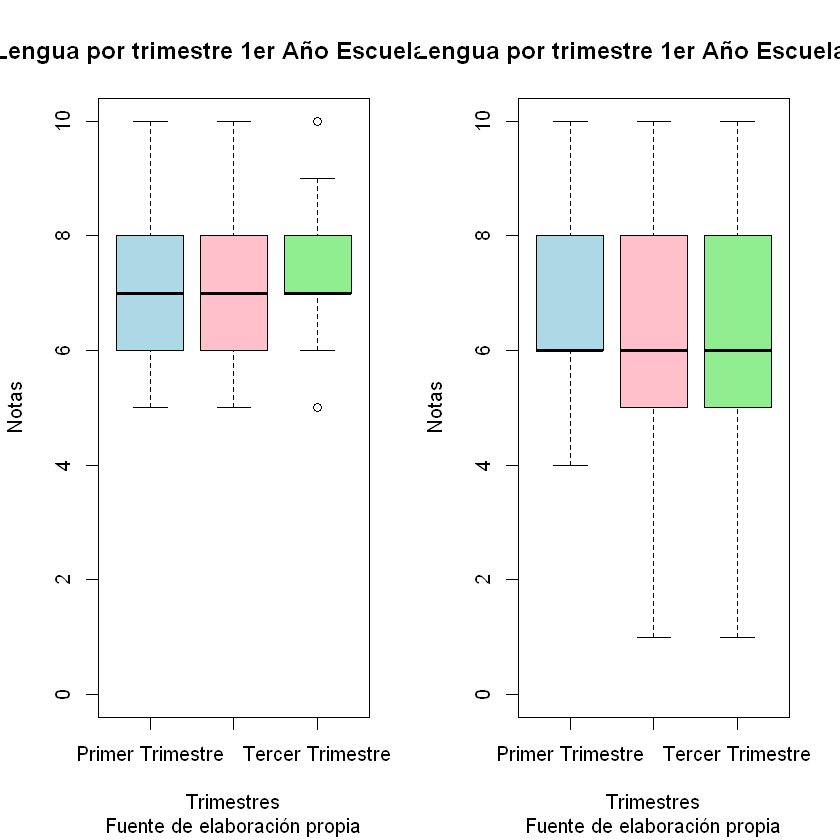

In [ ]:
#Análisis gráfico
layout(matrix(c(1,2), nrow = 1))
#Escuelas privadas
boxplot(lengua_secundaria_priv$Notas ~ matematica_secundaria_priv$Trimestres,
        col = c("lightblue", "pink", "lightgreen"),
        ylim = c(0,10),
        ylab = "Notas",
        xlab="Trimestres",
        sub="Fuente de elaboración propia",
        main="Notas Lengua por trimestre 1er Año Escuelas Privadas")
#Escuelas públicas
boxplot(lengua_secundaria_pub$Notas ~ matematica_secundaria_pub$Trimestres,
        col = c("lightblue", "pink", "lightgreen"),
        ylim = c(0,10),
        ylab = "Notas",
        xlab="Trimestres",
        sub="Fuente de elaboración propia",
        main="Notas Lengua por trimestre 1er Año Escuelas Públicas")

In [ ]:
#Planteamos nuestra hipótesis
#H0: No existe diferencia entre las notas de cada trimestre para Lengua en 1er Año en cada tipo de gestión
#H1: Al menos una de los trimestres difiere.
#Como se trata de una muestra pareada debemos aplicar el Test de Friedman
#Privadas
friedman.test(Notas~Trimestres | DNI, data =lengua_secundaria_priv) #pvalor: 4.809e-05 < 0.05, rechazamos H0
#Públicas
friedman.test(Notas~Trimestres | DNI, data= lengua_secundaria_pub)#pvalor: 0.001599 < 0.05, rechazamos H0
#Concluimos que para ambos tipos de gestión existe al menos un trimestre que difiere del resto.


	Friedman rank sum test

data:  Notas and Trimestres and DNI
Friedman chi-squared = 19.885, df = 2, p-value = 4.809e-05



	Friedman rank sum test

data:  Notas and Trimestres and DNI
Friedman chi-squared = 12.877, df = 2, p-value = 0.001599


In [ ]:
#Análisis a posteriori
#Privada
pairwise.wilcox.test(lengua_secundaria_priv$Notas,lengua_secundaria_priv$Trimestres, paired = TRUE)

#Pública
pairwise.wilcox.test(lengua_secundaria_pub$Notas, lengua_secundaria_pub$Trimestres, paired = TRUE)


	Pairwise comparisons using Wilcoxon signed rank test 

data:  lengua_secundaria_priv$Notas and lengua_secundaria_priv$Trimestres 

                  Primer Trimestre Segundo Trimestre
Segundo Trimestre 0.2891           -                
Tercer Trimestre  0.0015           5.2e-06          

P value adjustment method: holm 


	Pairwise comparisons using Wilcoxon signed rank test 

data:  lengua_secundaria_pub$Notas and lengua_secundaria_pub$Trimestres 

                  Primer Trimestre Segundo Trimestre
Segundo Trimestre 0.0093           -                
Tercer Trimestre  0.0906           0.8510           

P value adjustment method: holm 

# Análisis bivariado cualitativo

In [ ]:
#Creamos un nuevo dataset que solo contenga las materias troncales

DF_MateriasTroncales <- secundaria_promedios %>% filter(Materia %in% c("MATEMATICA", "LENGUA Y LITERATURA", "HISTORIA","GEOGRAFIA","FISICA","QUIMICA","LENGUAS EXTRANJERAS", "FISICA Y QUIMICA", "LITERATURA LATINOAMERICANA", "LITERATURA ARGENTINA"))
DF_MateriasTroncales <- DF_MateriasTroncales %>% mutate(Materia = case_when(
  Materia == "LITERATURA LATINOAMERICANA" ~ "LENGUA Y LITERATURA",
  Materia == "LITERATURA ARGENTINA" ~ "LENGUA Y LITERATURA",
  Materia == "LENGUA Y LITERATURA" ~ "LENGUA Y LITERATURA",
  Materia == "FISICA" ~ "CS NATURALES",
  Materia == "FISICA Y QUIMICA" ~ "CS NATURALES",
  Materia == "MATEMATICA" ~ "MATEMATICA",
  Materia == "HISTORIA" ~ "HISTORIA",
  Materia == "GEOGRAFIA" ~ "GEOGRAFIA",
  Materia == "LENGUAS EXTRANJERAS" ~ "LENGUAS EXTRANJERAS"))

DF_MateriasTroncales <- na.omit(DF_MateriasTroncales)

# Creamos las nuevas variables cualitativas a utilizar en este apartado

In [ ]:
# Variable desempeño:
DF_MateriasTroncales <- mutate(DF_MateriasTroncales, Desempeño = case_when(
  Promedio < 4 ~ "Insuficiente",
  Promedio >= 4 & Promedio < 6 ~ "Regular",
  Promedio >= 6 & Promedio < 7 ~ "Aprobado",
  Promedio >= 7 & Promedio < 8 ~ "Bueno",
  Promedio >= 8 & Promedio < 9 ~ "Muy bueno",
  Promedio >9  & Promedio <= 10 ~ "Distinguido") )

#Variable "Orientación": sugiere a los alumnos de los primeros tres años una orientación a partir de las notas obtenidas
#Primero creamos una columna ayuda que le asigna a cada materia una orientación
DF_MateriasTroncales_CB <- filter(DF_MateriasTroncales, Curso == 1 | Curso == 2 | Curso == 3)
DF_MateriasTroncales_CB <- DF_MateriasTroncales_CB %>% mutate (Orientacion_materia = case_when(
  Materia == "MATEMATICA" | Materia == "FISICA Y QUIMICA"| Materia == "FISICA"| Materia == "QUIMICA" ~ "Naturales",
  Materia == "LENGUA Y LITERATURA"| Materia == "HISTORIA"| Materia == "GEOGRAFIA" ~ "Sociales"))
#Luego creamos la columna propia de nuestro análisis
DF_MateriasTroncales_CB <- DF_MateriasTroncales_CB %>%
  group_by(DNI,Materia) %>%
  mutate(Orientacion = case_when(
    Orientacion_materia == "Sociales " &  Desempeño == "Bueno" | Desempeño == "Muy bueno"| Desempeño == "Distinguido" ~ "O.Sociales",
    Orientacion_materia == "Naturales" &  Desempeño == "Bueno" | Desempeño == "Muy bueno"| Desempeño == "Distinguido" ~ "O.Naturales",
    Orientacion_materia == "Sociales" | Orientacion_materia == "Naturales" &  Desempeño == "Bueno" | Desempeño == "Muy bueno"| Desempeño == "Distinguido" ~ "Multiorientacion",
    Desempeño == "Aprobado"| Desempeño == "Insuficiente"| Desempeño == "Regular" ~ "Sin orientacion"))

#Variable Eximido: etiqueta a los alumnos según la cantidad de materias desaprobadas al final del año (se utiliza la variable "desaprobado")
DF_MateriasTroncales <- mutate(DF_MateriasTroncales, Resultado = case_when(
  Promedio < 6 ~ "Desaprobado",
  Promedio >= 6 & NotasTTS < 6 ~ "Desaprobado",
  Promedio >= 6 & NotasTTS >= 6 ~ "Aprobado") )

DF_MateriasTroncales <- DF_MateriasTroncales %>%
  group_by(DNI) %>%
  mutate(Cantidad_Desaprobados = sum(str_detect(Resultado, regex("Desaprobado", ignore_case = TRUE))))

DF_MateriasTroncales<- DF_MateriasTroncales %>% mutate(Eximido = case_when(
  Cantidad_Desaprobados == 0 ~ "Eximido",
  Cantidad_Desaprobados  >= 1 & Cantidad_Desaprobados < 3 ~ "ParcialmenteEximido",
  Cantidad_Desaprobados > 3  ~ "NoEximido",
  TRUE ~ "sin registro completo"
))

# Análisis Desempeño General según la Gestión de la escuela

In [ ]:
#Creamos la tabla de contingencia:
CrossTable( DF_MateriasTroncales$Desempeño,
            DF_MateriasTroncales$EsPrivada,
            digits=1,
            prop.chisq = FALSE,
            format="SPSS")


   Cell Contents
|-------------------------|
|                   Count |
|             Row Percent |
|          Column Percent |
|           Total Percent |
|-------------------------|

Total Observations in Table:  10961 

                               | DF_MateriasTroncales$EsPrivada 
DF_MateriasTroncales$Desempeño |        N  |        S  | Row Total | 
-------------------------------|-----------|-----------|-----------|
                      Aprobado |     2218  |      660  |     2878  | 
                               |     77.1% |     22.9% |     26.3% | 
                               |     27.6% |     22.5% |           | 
                               |     20.2% |      6.0% |           | 
-------------------------------|-----------|-----------|-----------|
                         Bueno |     1810  |      712  |     2522  | 
                               |     71.8% |     28.2% |     23.0% | 
                               |     22.5% |     24.3% |           | 
            

In [ ]:
#Análisis gráfico
tabla_variables_fila_desemp<-round(prop.table( table( DF_MateriasTroncales$EsPrivada, DF_MateriasTroncales$Desempeño ),1)*100,1)
tabla_variables_fila_desemp<-t(tabla_variables_fila_desemp)
tabla_variables_fila

colores <- sample(colors(), 6)

bpc<-barplot(tabla_variables_fila_desemp,
             main = "Desempeño en Materias Troncales según la Gestión",
             beside = TRUE, # Barras agrupadas
             space = c(0.1, 2.5), # Espacio primer elemento es el espacio entre barras de cada grupo (0.1) y el segundo el espacio entre grupos (2.5).
             ylim = c(0,40),
             cex.axis = 1.2, #tamaño etiquetas eje y
             cex.names=1.5, #tamaño etiqueta eje x
             cex.main=1.5, #tamaño título gráfico
             col=colores,
             #legend.text = rownames(tabla_variables_fila),
             xlab = "Es Privada?",
             cex.lab=1.5, #tamaño  xlab ylab
             ylab = "Desempeño",
             col.lab = "blue",
             sub= "Fuente de elaboración propia")

#leyenda
legend("top", rownames(tabla_variables_fila_desemp),
       title = "Desempeño", # Título
       title.adj = 0.5,          # Ajuste horizontal del título
       title.col = "black",       # Color del título
       lty = c(1),
       col=colores,
       lwd = 2,
       cex =  0.6)# Cambiar el tamaño

# valores sobre barras
TC <- tabla_variables_fila_desemp
text(bpc, TC+2.5,format(TC), cex=1.2)

In [ ]:
#Análisis estadístico
#Planteamos la pregunta e hipótesis: ¿Existe una asociación entre tener un buen desempeño y el tipo de escuela al que se asiste?
#H0: El desempeño en las materias troncales no está asociado a la gestión de la escuela (independiente)
#H1: El desempeño está asociado (dependiente)

#Prueba estadística ---> Chi-cuadrado
chi_desemp<-chisq.test( DF_MateriasTroncales$Desempeño, DF_MateriasTroncales$EsPrivada )
chi_desemp #--> pvalor = 2.2e-16 < 0.05, rechazamos H0 existe una asociación entre el desempeño en Matemática y el de Lengua
#Valores observados
chi_desemp$observed
#Valores esperados
round(chi_desemp$expected,0)
#Residuos
round(chi_desemp$residuals, 1)
#Residuos corregidos
round(chi_desemp$stdres,1)

#Coeficiente V de Cramer para ver que tan fuerte es la asociación
CramerV(DF_MateriasTroncales$Desempeño,DF_MateriasTroncales$EsPrivada) #Valor obtenido =  0.2308645 --> podemos concluir que existe una asociacion que puede definirse entre debil/media


	Pearson's Chi-squared test

data:  DF_MateriasTroncales$Desempeño and DF_MateriasTroncales$EsPrivada
X-squared = 584.2, df = 5, p-value < 2.2e-16


                              DF_MateriasTroncales$EsPrivada
DF_MateriasTroncales$Desempeño    N    S
                  Aprobado     2218  660
                  Bueno        1810  712
                  Distinguido   553  449
                  Insuficiente   98    6
                  Muy bueno    1453  849
                  Regular      1901  252

,N,S
Aprobado,2109,769
Bueno,1848,674
Distinguido,734,268
Insuficiente,76,28
Muy bueno,1687,615
Regular,1578,575


                              DF_MateriasTroncales$EsPrivada
DF_MateriasTroncales$Desempeño     N     S
                  Aprobado       2.4  -3.9
                  Bueno         -0.9   1.5
                  Distinguido   -6.7  11.1
                  Insuficiente   2.5  -4.1
                  Muy bueno     -5.7   9.4
                  Regular        8.1 -13.5

                              DF_MateriasTroncales$EsPrivada
DF_MateriasTroncales$Desempeño     N     S
                  Aprobado       5.3  -5.3
                  Bueno         -2.0   2.0
                  Distinguido  -13.6  13.6
                  Insuficiente   4.9  -4.9
                  Muy bueno    -12.4  12.4
                  Regular       17.6 -17.6

ERROR: Error in CramerV(DF_MateriasTroncales$Desempeño, DF_MateriasTroncales$EsPrivada): no se pudo encontrar la función "CramerV"


# Análisis de la Orientación sugerida según el sector de la escuela

In [ ]:
#Creamos la tabla de contingencia
CrossTable( DF_MateriasTroncales_CB$EsPrivada,
            DF_MateriasTroncales_CB$Orientacion,
            digits=1,
            prop.chisq = FALSE,
            format="SPSS")


   Cell Contents
|-------------------------|
|                   Count |
|             Row Percent |
|          Column Percent |
|           Total Percent |
|-------------------------|

Total Observations in Table:  5989 

                                  | DF_MateriasTroncales_CB$Orientacion 
DF_MateriasTroncales_CB$EsPrivada | Multiorientacion  |      O.Naturales  |       O.Sociales  |  Sin orientacion  |        Row Total | 
----------------------------------|------------------|------------------|------------------|------------------|------------------|
                                N |            2080  |             147  |            1089  |            1232  |            4548  | 
                                  |            45.7% |             3.2% |            23.9% |            27.1% |            75.9% | 
                                  |            82.5% |            71.4% |            62.1% |            81.6% |                  | 
                                  |     

In [ ]:
#Análisis gráfico
tabla_variables_fila_orientacion<-round(prop.table( table( DF_MateriasTroncales_CB$EsPrivada, DF_MateriasTroncales_CB$Orientacion),1)*100,1)
tabla_variables_fila_orientacion<-t(tabla_variables_fila_orientacion)
tabla_variables_fila_orientacion

colores <- sample(colors(), 4)


bpc<-barplot(tabla_variables_fila_orientacion,
             main = "Relación Orientación sugerida y Gestión",
             beside = TRUE, # Barras agrupadas
             space = c(0.1, 2.5), # Espacio primer elemento es el espacio entre barras de cada grupo (0.1) y el segundo el espacio entre grupos (2.5).
             ylim = c(0,70),
             cex.axis = 1.2, #tamaño etiquetas eje y
             cex.names=1.5, #tamaño etiqueta eje x
             cex.main=1.5, #tamaño título gráfico
             col=colores,
             #legend.text = rownames(tabla_variables_fila),
             xlab = "Es Privada?",
             cex.lab=1.5, #tamaño  xlab ylab
             ylab = "Condición",
             col.lab = "blue",
             sub= "Fuente de elaboración propia")

#leyenda
legend("top", rownames(tabla_variables_fila_orientacion),
       title = "Orientación", # Título
       title.adj = 0.5,          # Ajuste horizontal del título
       title.col = "black",       # Color del título
       lty = c(1),
       col=colores,
       lwd = 2,
       cex =  1)# Cambiar el tamaño

# valores sobre barras
TC <- tabla_variables_fila_orientacion
text(bpc, TC+2.5,format(TC), cex=1.2)

In [ ]:
#Análisis estadístico
#Planteamos la pregunta e hipótesis: ¿Existe una asociación entre la orientación sugerida y el tipo de escuela a la que se asiste?
#H0: No están asociadas (independientes)
#H1: Están asociadas (Dependiente)

#Prueba estadística: Chi-cuadrado
chi_O_Pub <-chisq.test( DF_MateriasTroncales_CB$Orientacion , DF_MateriasTroncales_CB$EsPrivada )
chi_O_Pub #pvalor : 2.2e-16 <0.05 --> Rechazamos H0, concluimos que si existe una asociación entre el tipo de escuela y la orientación sugerida
#Valores observados
chi_O_Pub$observed
#Valores esperados
round(chi_O_Pub$expected,0)
#Residuos
round(chi_O_Pub$residuals, 1)
#Residuos corregidos
round(chi_O_Pub$stdres,1)

#Coeficiente V de Cramer para ver que tan fuerte es la asociación
CramerV(DF_MateriasTroncales_CB$Orientacion, DF_MateriasTroncales_CB$EsPrivada)
#Valor obtenido: 0.213 --> Asociación moderada


	Pearson's Chi-squared test

data:  DF_MateriasTroncales_CB$Orientacion and DF_MateriasTroncales_CB$EsPrivada
X-squared = 273.53, df = 3, p-value < 2.2e-16


                  
                      N    S
  Multiorientacion 2080  440
  O.Naturales       147   59
  O.Sociales       1089  665
  Sin orientacion  1232  277

,N,S
Multiorientacion,1914,606
O.Naturales,156,50
O.Sociales,1332,422
Sin orientacion,1146,363


                  
                      N    S
  Multiorientacion  3.8 -6.8
  O.Naturales      -0.8  1.3
  O.Sociales       -6.7 11.8
  Sin orientacion   2.5 -4.5

                  
                       N     S
  Multiorientacion  10.2 -10.2
  O.Naturales       -1.6   1.6
  O.Sociales       -16.1  16.1
  Sin orientacion    6.0  -6.0

ERROR: Error in CramerV(DF_MateriasTroncales_CB$Orientacion, DF_MateriasTroncales_CB$EsPrivada): no se pudo encontrar la función "CramerV"


# Análisis Multivariado

# Comparación de las notas obtenidas en las materias troncales para 1er Año por Sector

In [ ]:
#Creamos el dataframe utilizado para el análisis
MT_Primero <- secundaria_promedios %>% filter(Materia %in% c("MATEMATICA", "LENGUA Y LITERATURA", "HISTORIA","GEOGRAFIA","FISICA Y QUIMICA","LENGUAS EXTRANJERAS") & Curso == 1)

#Creamos un dataset que contiene las notas para cada materia en columnas separadas
Comparacion_sector_primero <- MT_Primero %>% distinct(DNI,EsPrivada,Materia,Promedio) %>%spread(Materia,Promedio) %>% mutate( EsPrivada = case_when(
                                                                                                                                    EsPrivada == "S" ~ "Privada",
                                                                                                                                    EsPrivada == "N"~ "Pública"))

Comparacion_sector_primero <- na.omit(Comparacion_sector_primero)
#Creamos vector de perfiles medios
perfilmedio_primero_sector <- Comparacion_sector_primero %>% group_by(EsPrivada) %>% summarise_all(mean, na.rm = TRUE)

In [ ]:
#Análisis gráfico
#Utilizamos un gráfico de coordenadas paralelas para visualizar si existe diferencia
ggparcoord(data = perfilmedio_primero_sector,
           columns = 3:8,
           groupColumn = "EsPrivada",
           showPoints = TRUE,
           scale = "globalminmax")+ ggtitle("Comparación perfiles medios de 1er Año en Materias Troncales") +
  labs(subtitle = "Fuente de elaboración propia") +
  theme(plot.title = element_text(hjust = 0.5, face = "bold", size = 16),
        plot.subtitle = element_text(hjust = 0.5, size = 14))

In [ ]:
#Función de Mardia
mardia2<-function(datos){
  n<-nrow(datos)
  k<-ncol(datos)

  x<-as.matrix(datos)
  media<-colMeans(datos)
  matriz.media<-matrix(media,nrow=n,ncol=k,byrow=TRUE)

  S<-cov(datos)*(n-1)/n
  SI<-solve(S)   #Inversa de la matriz de covarianzas

  distm<-((x-matriz.media)%*%SI)%*%t((x-matriz.media))

  gl<-k*(k+1)*(k+2)/6

  # Medida de Asimetría Multivariada
  AM<-sum(distm^3)/n^2

  if (n<30){
    # Test Multivariado de Asimetría de Mardia - Muestras Pequeñas
    c<-(n+1)*(n+3)*(k+1)/(n*((n+1)*(k+1)-6))
    TAM<-n*c/6*AM
    valor_p1<-pchisq(TAM,gl,lower.tail = FALSE)
  } else {
    # Test Multivariado de Asimetríıa de Mardia - Muestras grandes
    TAM<-n/6*AM
    valor_p1<-pchisq(TAM,gl,lower.tail = FALSE)
  }
  #Medida de Kurtosis Multivariado
  KM<-sum((diag(distm))^2)/n

  #Test Multivariado de Kurtosis de Mardia
  TKM<-(KM-k*(k+2))*sqrt(n/(8*k*(k+2)))
  TKM2<-TKM^2
  valor_p2<-pchisq(TKM2,1,lower.tail = FALSE)

  cat("Test de Normalidad Multivariada", "\n" ,
      "Ho: Los datos siguen una Distribución Normal Multivariada","\n")
  cat("----------------------------------------------------------------","\n")
  cat("Prueba de Mardia - Asimetría","\n",
      "Asimetría Multivariada =", AM, "\n",
      "Valor de TAM =",TAM, "\n",
      "Valor p=", valor_p1, "\n")
  cat("----------------------------------------------------------------","\n")
  cat("Prueba de Mardia - Curtosis","\n",
      "Curtosis Multivariado =", KM, "\n",
      "Valor de TKM =",TKM2, "\n",
      "Valor p=", valor_p2, "\n")
}

In [ ]:
#Análisis estadístico
#Planteamos la hipótesis
#H0: No existe diferencia significativa entre vectores medios de cada sector
#H1: Existe diferencia significativa
#Antes de revisar si existe esta diferencia debemos revisar los supuestos de normalidad multivariada a través de la función de Mardia
#Para pasar esta prueba debe cumplir las condiciones de Kurtosis y Asimetría
mardia2(Comparacion_sector_primero[,3:8])
#Como puede verse obtenemos que nuestra muestre no cumple con los supuestos de normalidad multivariada por lo que no es posible aplicar un test que
#nos permita evaular si existe una diferencia estadística significativa

In [ ]:
#Para ver que no solo ocurre en el primer año, realizamos el mismo gráfico de perfiles paralelos en general según el tipo de gestión
Comparacion_MT_G <- DF_MateriasTroncales%>% distinct(CUE,DNI,EsPrivada, Materia,Promedio) %>%spread(Materia,Promedio)

#Perfil de medias por gestión
perfilmedio_gestión <- Comparacion_MT_G %>% group_by(EsPrivada) %>% summarise_all(mean, na.rm = T )

#Gráfico de perfiles paralelos
ggparcoord(data = perfilmedio_gestión,
           columns = 4:9,
           groupColumn = "EsPrivada",
           showPoints = TRUE,
           scale = "globalminmax")+ ggtitle("Comparación perfiles medios generales en Materias Troncales") +
  labs(subtitle = "Fuente de elaboración propia") +
  theme(plot.title = element_text(hjust = 0.5, face = "bold", size = 16),
        plot.subtitle = element_text(hjust = 0.5, size = 14))

# Comparación de las notas obtenidas en Historia, Matematica y Lenguas Extranjeras por Sector

In [ ]:
#Creamos el dataset a utilizar
DF_MateriasTroncales <- secundaria_promedios %>% filter(Materia %in% c("MATEMATICA", "LENGUA Y LITERATURA", "HISTORIA","GEOGRAFIA","FISICA","QUIMICA","LENGUAS EXTRANJERAS"))

#Dataset con las notas de cada materia por columna
Comparacion_MT<- DF_MateriasTroncales%>% distinct(CUE,DNI,EsPrivada, Curso,Materia,Promedio) %>%spread(Materia,Promedio)

#Seleccionamos las materias de interés para este análisis
MT_Cursos_3D <- dplyr::select(Comparacion_MT, Curso,MATEMATICA, HISTORIA, 'LENGUAS EXTRANJERAS')
MT_Sector_3D <- filter(MT_Sector_3D, CUE == 6006252 | CUE == 6002268 | CUE == 6005416|CUE == 6006612 | CUE == 6000116)
colnames(MT_Cursos_3D)[colnames(MT_Cursos_3D) == "LENGUAS EXTRANJERAS"] <- "LENG_EXTRANJERAS"
MT_Cursos_3D <-  na.omit(MT_Cursos_3D)

#Creamos el vector de perfiles medios
perfil_medio_escuelas<- MT_Sector_3D %>% group_by(CUE) %>% summarise_all(mean, na.rm = T)
#Le asignamos el sector a cada una para poder distinguirla
perfil_medio_escuelas <- perfil_medio_escuelas %>% mutate(Sector = case_when(
  CUE == 6006252 ~ "Pública",
  CUE == 6002268 ~ "Pública",
  CUE == 6005416 ~ "Pública",
  CUE == 6006612 ~ "Privada",
  CUE == 6000116 ~ "Privada"
))

In [ ]:
#Análisis gráfico
#Scatterplot 3D
colors <- c("#008B00", "firebrick4") #cambie los colores para que azul sea compañia C

colors <- colors[as.factor(perfil_medio_escuelas$Sector)]

with(perfil_medio_escuelas, {
  s3d <- scatterplot3d(
    x = MATEMATICA,
    y = HISTORIA,
    z = LENG_EXTRANJERAS,
    color = colors,
    pch = 16,
    type = "h",
    main = "SCATTERPLOT 3D SEGÚN LA GESTIÓN DE LA ESCUELA",
    xlab = "MATEMATICA",
    ylab = "HISTORIA",
    zlab = "LENGUAS EXTRANJERAS",
    sub = "FUENTE DE ELABORACIÓN PROPIA")

  # convert 3-D coords to 2D projection/*G_EXTRANJERAS)
  s3d.coords <- s3d$xyz.convert(MATEMATICA, HISTORIA, LENG_EXTRANJERAS)
  # plot text with 50% shrink and place to right of points
  text(s3d.coords$x,
       s3d.coords$y,
       labels = perfil_medio_escuelas$CUE,
       cex = .9,
       pos = 4)
})

legend("bottomright",
       legend = c("Escuelas Pública", "Escuelas Privada"),
       fill = c("firebrick4", "#008B00"))

# Para el último análisis nos basaremos en la condición de "eximido". Intentando averiguar si el desempeño en el 1er Trimestre de los alumnos afecta a la cantidad de materias desaprobadas a final del año. Esto se efecutará diferenciando el sector.

In [ ]:
#Primero realizaremos una tabla de contigencia para ver la división de los alumnos según su condición y sector
CrossTable( DF_MateriasTroncales$Eximido,
            DF_MateriasTroncales$EsPrivada,
            digits=1,
            prop.chisq = FALSE,
            format="SPSS")
#Análisis gráfico
tabla_variables_fila_ex<-round(prop.table( table(DF_MateriasTroncales$EsPrivada, DF_MateriasTroncales$Eximido),1)*100,1)
tabla_variables_fila_ex<-t(tabla_variables_fila_ex)
tabla_variables_fila_ex

colores <- sample(colors(), 4)

bpc<-barplot(tabla_variables_fila_ex,
             main = "Relación Cond. Eximido de los alumnos y tipo de escuela a la que asiste",
             beside = TRUE, # Barras agrupadas
             space = c(0.1, 2.5), # Espacio primer elemento es el espacio entre barras de cada grupo (0.1) y el segundo el espacio entre grupos (2.5).
             ylim = c(0,110),
             cex.axis = 1.2, #tamaño etiquetas eje y
             cex.names=1.5, #tamaño etiqueta eje x
             cex.main=1.5, #tamaño título gráfico
             col=colores,
             #legend.text = rownames(tabla_variables_fila),
             xlab = "Sector",
             cex.lab=1.5, #tamaño  xlab ylab
             ylab = "Condición",
             col.lab = "blue",
             sub= "Fuente de elaboración propia")

#Leyenda
legend("top", rownames(tabla_variables_fila_ex),
       title = "Condición", # Título
       title.adj = 0.5,          # Ajuste horizontal del título
       title.col = "black",       # Color del título
       lty = c(1),
       col=colores,
       lwd = 2,
       cex =  0.7)# Cambiar el tamaño

# valores sobre barras
TC <- tabla_variables_fila_ex
text(bpc, TC+2.5,format(TC), cex=1.2)

In [ ]:
#Análisis multivariado
DF_MateriasTroncales <- na.omit(DF_MateriasTroncales)

MT_PrimerT <- DF_MateriasTroncales %>% distinct(DNI,Materia,EsPrivada, NotasPTS, Eximido) %>% spread(Materia, NotasPTS)

#Separamos por sector
MT_PrimerT_Priv <- filter(MT_PrimerT, EsPrivada == "S")
MT_PrimerT_Pub <- filter(MT_PrimerT, EsPrivada == "N")

In [ ]:
#Análisis gráfico
MT_PrimerT_escaladopub <- data.frame("Condicion"=MT_PrimerT_Pub$Eximido,"Matematica"=rescale(MT_PrimerT_Pub$MATEMATICA,to=c(0,1)),
                  "Lengua y Lit"=rescale(MT_PrimerT_Pub$`LENGUA Y LITERATURA`,to=c(0,1)),
                  "Historia"=rescale(MT_PrimerT_Pub$HISTORIA,to=c(0,1)),
                  "Geografia"=rescale(MT_PrimerT_Pub$GEOGRAFIA,to=c(0,1)),
                  "Ingles"=rescale(MT_PrimerT_Pub$`LENGUAS EXTRANJERAS`,to=c(0,1)))

MT_PrimerT_escaladopriv <- data.frame("Condicion"=MT_PrimerT_Priv$Eximido,"Matematica"=rescale(MT_PrimerT_Priv$MATEMATICA,to=c(0,1)),
                                      "Lengua y Lit"=rescale(MT_PrimerT_Priv$`LENGUA Y LITERATURA`,to=c(0,1)),
                                      "Historia"=rescale(MT_PrimerT_Priv$HISTORIA,to=c(0,1)),
                                      "Geografia"=rescale(MT_PrimerT_Priv$GEOGRAFIA,to=c(0,1)),
                                      "Ingles"=rescale(MT_PrimerT_Priv$`LENGUAS EXTRANJERAS`,to=c(0,1)))
#Perfiles medio de escalado por sector
perfilmedio_escalado_1T_priv<- MT_PrimerT_escaladopub %>% group_by(Condicion) %>% summarise_all(mean, na.rm = T)
perfilmedio_escalado_1T_pub<- MT_PrimerT_escaladopriv %>% group_by(Condicion) %>% summarise_all(mean, na.rm = T)

#Gráficos
#Escuelas privadas
lcols <- c("#5CB85C", "#46B8DA", "#A52A2A", "yellow")
ggradar(perfilmedio_escalado_1T_priv, grid.min=0, grid.max=1,
        values.radar = c(0, 0.5, 1),
        background.circle.colour = "white",
        axis.line.colour = "gray60",
        gridline.min.colour = "gray60",
        gridline.mid.colour = "gray60",
        gridline.max.colour = "gray60",
        group.colours = lcols,
        legend.title = "Condición",
        legend.position = "bottom") +
  labs(title = "Notas 1er T según condición Esc. Privada")+ ggtitle("Radar Notas 1erT según condición para Esc. Privadas") +
  labs(subtitle = "Fuente de elaboración propia") +
  theme(plot.title = element_text(hjust = 0.5, face = "bold", size = 16),
        plot.subtitle = element_text(hjust = 0.5, size = 14))

#Escuelas públicas
lcols <- c("#5CB85C", "#46B8DA", "#A52A2A", "yellow")
ggradar(perfilmedio_escalado_1T_priv, grid.min=0, grid.max=1,
        values.radar = c(0, 0.5, 1),
        background.circle.colour = "white",
        axis.line.colour = "gray60",
        gridline.min.colour = "gray60",
        gridline.mid.colour = "gray60",
        gridline.max.colour = "gray60",
        group.colours = lcols,
        legend.title = "Condición",
        legend.position = "bottom") +
  labs(title = "Notas 1er T según condición Esc. Pública")+ ggtitle("Radar Notas 1erT según condición para Esc. Públicas") +
  labs(subtitle = "Fuente de elaboración propia") +
  theme(plot.title = element_text(hjust = 0.5, face = "bold", size = 16),
        plot.subtitle = element_text(hjust = 0.5, size = 14))